In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 
from sympy import integrate

DEMOSTRACION INTEGRALES 1
 → $$\frac{f(a)}{(a-b)} \frac{x^2}{2}-bx + \frac{f(b)}{(b-a)}(\frac{x^2}{2}-ax)$$
 reemplazamos los límites
 $$\frac{f(a)}{(a-b)}[ \frac{-b^2-a^2+2ab}{2}] + \frac{f(b)}{(b-a)}(\frac{b^2-2ab+a^2}{2})$$

factorizamos numerador:
$$-\frac{f(a)}{(a-b)}[\frac{(a-b)^2}{2}] + \frac{f(b)}{(b-a)}(\frac{(b-a)^2}{2})$$

reducimos terminos
$$f(a)[\frac{(b-a)}{2}] + f(b)(\frac{(b-a)}{2})$$

factorizamos
$$\frac{f(a)+f(b)}{2} (b-a)$$



DEMOSTRACION MÉTODO TRAPECIO SIMPLE
$∫\frac{(x-b)(x-(a+b)/2)}{(a-b)(a-(a+b)/2)}f(a)$+ $∫\frac{(x-a)(x-b)}{((a+b)/2-a)((a+b)/2 -b)}f((a+b)/2)$+$∫\frac{(x-a)(x-(a+b)/2)}{((b-a)((b-(a+b)/2)}f(b)$
al integrar y evaluar quedan los terminos
$$\frac{b^3a^3+3ba^2}{12} \frac{f(a)}{(a-b)^2}$$


EXISTENCIA UNICIDAD DEL POLINOMIO INTERPOLADOR

Tenemos 3 puntos $$x0,x1,x2$$ que serán interpolados por dos polinomios $$Q(x), P(x) →  ax^2+bx+c $$.

 Entonces, existe polinomio $R(x)= Q(x)- P(x)$ donde al evaluar la resta de la función en cada punto que intersectan ambos polinomios obtenemos:
$$R(x)= Q(x0)- P(x0) = 0$$ $$R(x)= Q(x1)- P(x1)=0$$ $$R(x)= Q(x2)- P(x2)=0$$

debido a que las restas nos dan cero, obtemos entonces que $x0,x1,x2$ son raíces de $R(x)$, sin embargo, $R(x)$ es polinomio de la forma $ ax^2+bx+c$ por lo que la única forma de que dicho polinomio tenga dos raíces es que: $$R(x)=0$$
Si lo anterior pasa entonces tenemos:
$$  Q(x)- P(x)=0$$ $$  Q(x)=  P(x)$$

Se demuestra que los polinomios interpoladores son únicos.


[1.5910402  1.12909058 0.96156358 0.89229605 0.87802547 0.90723173
 0.98196708 1.11611401 1.34209467 1.73278338]
[1.59639318 1.13000098 0.96192003 0.89250713 0.87819711 0.907414
 0.98220604 1.11648271 1.34275077 1.73414918]


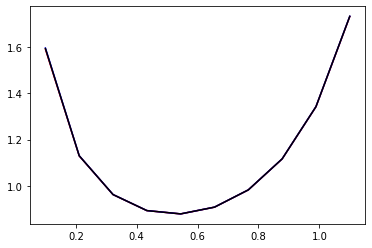

In [ ]:

#PRONLEMA 8 DERIVADAS(lograr una derirvada progresiva de orden h**2) 

#a) Calcular analıticamente el polinomio que interpola el conjunto soporte.
c=1
Poly = lambda x : x**2+x+c
#b) Derivar el polinomio interpolador para encontrar la derivada en el punto x

intervalo= np.linspace(0.1,1.1,10)
tan = np.tan(intervalo)

def df_progresiva(f,x,h):
  df=np.zeros_like(intervalo)
  for i in range(len(x)):
    df_1= 1/(2*h)*(-3*f(x[i])+4*f(x[i]+h)-f(x[i]+(2*h)))
    df[i]=df_1
  return df

def df_central (f,x,h):
  df_central = np.zeros_like(intervalo)
  if h!=0:
     return (f(x+h)-f(x-h))/(h*2)

def df_analitica(x):
  return (1/(np.cos(x))**2)/(2*((np.tan(x))**0.5))

tan = lambda x: np.sqrt(np.tan(x))
y_progresiva= df_progresiva(tan,intervalo,1e-2)
y_central= df_central (tan,intervalo,1e-2)

y_analitica= df_analitica(intervalo)

plt.plot(intervalo,y_progresiva, "r")
plt.plot (intervalo, y_central,"b")
plt.plot(intervalo, y_analitica, "k")

print(y_progresiva)
print(y_central)






In [ ]:

#raices de polinomios
#5. (SymPy) Calcular todas las ra´ıces reales de los primeros 20 polinomios de Laguerre. La
#formula de rodrigues es:
n= 20
x= sym.Symbol('x')


def GetPolys (n):
  polys=[]
  for i in range(n): 
    factorial = np.math.factorial(i)
    y= sym.exp(-x)*(x**i)
    dy= y.diff(x,i)
    Poly= (sym.exp(x)/factorial)*dy
    Poly= sym.simplify(Poly)
    polys.append(Poly)
  return polys

polinomios_laguere = GetPolys(n)
d_poly=[]

for i in range(len(polinomios_laguere)):
  diff= polinomios_laguere[i].diff(x)
  d_poly.append(diff)


def MedNewtonRaphson (f,df,x0,Toleracia=1e-5,itmax=100): 
   error= 1
   it=0
   while error > Toleracia and it<=itmax:
     x = x0-f(x0)/df(x0)
     error = np.abs(f(x0)/df(x0))
     x0=x
     it+=1
    
   if it==itmax:
     False
   else:
     return x

def Conjunto_raices(f,df,x,precision=4):
   raices= []
   dan= np.array([])
   conjunto= []

   for i in x:
     raiz = MedNewtonRaphson(f,df,i)
     
     if raiz != False:
       n_raiz= np.round(raiz, precision)
       conjunto.append(n_raiz)

       if n_raiz not in raices:
         raices = np.append(raices,n_raiz)

   raices.sort()
   return raices

xn=np.linspace(0,100,100)
raices= []

for i in range(1,len(polinomios_laguere)):
  poly = sym.lambdify([x],polinomios_laguere[i],'numpy')
  dif= sym.lambdify([x],d_poly[i],'numpy')
  raiz= Conjunto_raices(poly,dif,xn)
  raices.append(raiz)

print(raices)

[array([1.]), array([0.5858, 3.4142]), array([0.4158, 2.2943, 6.2899]), array([0.3225, 1.7458, 4.5366, 9.3951]), array([ 0.2636,  1.4134,  3.5964,  7.0858, 12.6408]), array([ 0.2228,  1.1889,  2.9927,  5.7751,  9.8375, 15.9829]), array([ 0.193 ,  1.0267,  2.5679,  4.9004,  8.1822, 12.7342, 19.3957]), array([ 0.1703,  0.9037,  2.2511,  4.2667,  7.0459, 10.7585, 15.7407,
       22.8631]), array([ 0.1523,  0.8072,  2.0051,  3.7835,  6.205 ,  9.373 , 13.4662,
       18.8336, 26.3741]), array([ 0.1378,  0.7295,  1.8083,  3.4014,  5.5525,  8.3302, 11.8438,
       16.2793, 21.9966, 29.9207]), array([ 0.1258,  1.6472,  3.0911,  5.0293,  7.5099, 10.606 , 14.4316,
       19.1789, 25.2177, 33.4972]), array([ 0.1157,  2.8338,  4.5992,  6.8445,  9.6213, 13.0061, 17.1169,
       22.1511, 28.488 , 37.0991]), array([ 0.1071,  2.6166,  4.2388,  6.2923,  8.815 , 11.8614, 15.5108,
       19.8846, 25.1853, 31.8004, 40.723 ]), array([ 0.0997,  1.3006,  2.4308,  3.9321,  5.8255,  8.1402, 10.9165,
       14.

Interpolación de Lagrange:

Problemas: 1,

1 Demuestre que el polinomio interpolador es único:

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.22044604925031e-16


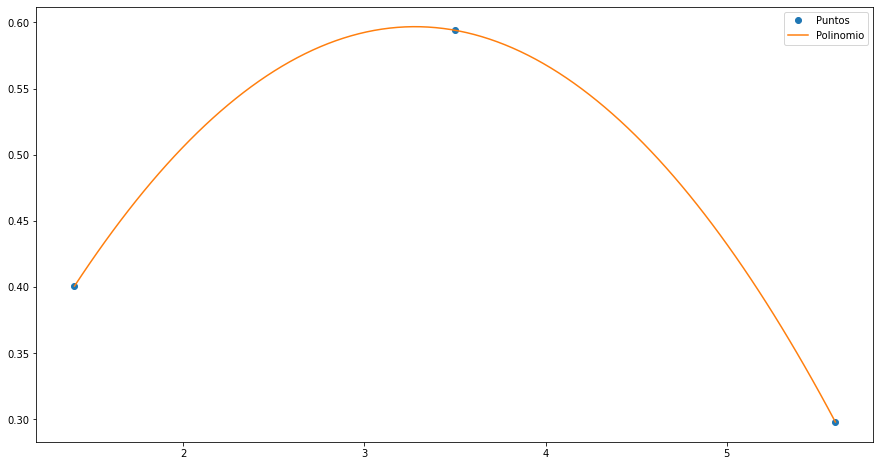

In [ ]:
#4
x=sym.Symbol("x")

def Lagrange(xi,fi):
  polinomio=0
  for i in range(len(xi)):
    numerador=1
    denominador=1
    for j in range(len(xi)):
      if j!=i:
        numerador*= x-xi[j]
        denominador *= xi[i]-xi[j]

    termino=numerador/denominador
    polinomio+= termino*fi[i]

  return polinomio

def valores(xi,fi):
  polinomio= Lagrange(xi,fi)
  simplicacion = polinomio.expand()
  px=sym.lambdify(x,simplicacion)
  muestra = 100
  a,b = min(xi),max(xi)
  pxi= np.linspace(a,b,muestra)
  pfi= px(pxi)
  return pxi,pfi,polinomio,simplicacion

def graficar(xi,fi,pxi,pfi):
  plt.subplots(figsize=(15,8))
  plt.plot(xi,fi,"o",label="Puntos")
  plt.plot(pxi,pfi,label="Polinomio")
  plt.legend()

xi=np.array([1.4,3.5,5.6])
yi=np.array([0.4007954931819738,0.594128102489774,0.29802795523938164])

pxi,pfi,polinomio,simplicacion= valores(xi,yi)
print(simplicacion)
grafica = graficar (xi,yi,pxi,pfi)

In [ ]:
#SUPERCONDUCTIVIDAD
def funcion (x, T, dT=0):
  return (np.tanh(np.sqrt(x**2+dT**2))*(300/2*T))/np.sqrt(x**2+dT**2)

Raices, Pesos = np.polynomial.legendre.leggauss(20)

temps= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Tc=0
tempetature=[]
for j in temps:
  suma=0
  for i in range(20):
    valor = Pesos[i]*funcion(Raices[i],j)
    suma+=valor
    if i == 19:
      tempetature.append(suma)

tempetature

[272.9024260837037,
 545.8048521674074,
 818.7072782511109,
 1091.6097043348148,
 1364.512130418518,
 1637.4145565022218,
 1910.3169825859254,
 2183.2194086696295,
 2456.1218347533327,
 2729.024260837036,
 3001.9266869207404,
 3274.8291130044436,
 3547.7315390881467,
 3820.633965171851,
 4093.536391255554,
 4366.438817339259,
 4639.341243422963,
 4912.243669506665,
 5185.146095590369,
 5458.048521674072]

Relación trayectoria de lanzamiento parabólico

5_ interpolacion

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0


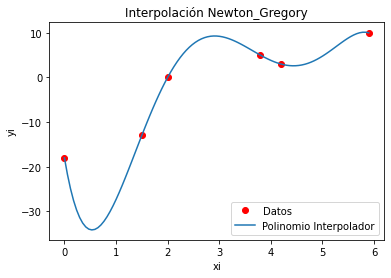

In [ ]:
from csv import reader
import urllib.request
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'

data=[[0,-18],
[1.5,-13],
[2,0],
[3.8,5],
[4.2,3],
[5.9,10]]

datos= np.array(data)
xi=[]
yi=[]
for i in range(len(datos)):
  xi.append(datos[i][0])
  yi.append(datos[i][1])

title= ['i','xi','fi']
n=len(xi)
ki=np.arange(0,n,1)
matrix= np.concatenate(([ki],[xi],[yi]),axis=0)
matrix= np.transpose(matrix)

dfinita = np.zeros(shape=(n,n),dtype=float)
matrix= np.concatenate((matrix,dfinita),axis=1)


#Calcular la matrix
[n,m]=np.shape(matrix)
diagonal = n-1
j=3
while j < m: 
  title.append('F['+str(j-2)+']')
  i=0
  paso= j-2
  while (i<diagonal):
    denominador =(xi[i+paso]-xi[i])
    numerador = matrix[i+1,j-1]-matrix[i,j-1]
    matrix[i,j]= numerador/denominador
    i+=1
  diagonal -= 1
  j+=1

#Polinomio con diferencias divididas
dDividida= matrix[0,3:]
n=len(dfinita)

x=sym.Symbol('x')
polinomio=yi[0]
for j in range(1,n,1):
  factor=dDividida[j-1]
  termino=1
  for k in range(0,j,1):
    termino = termino*(x-xi[k])
  polinomio=polinomio+termino*factor

simplificacion= polinomio.expand()
px=sym.lambdify(x,simplificacion)
print(simplificacion)
muestra=101
a=np.amin(xi)
b=np.amax(xi)
pxi=np.linspace(a,b,muestra)
pfi=px(pxi)

#Graficar
plt.plot(xi,yi,'o',color='r',label='Datos')
plt.plot(pxi,pfi,label='Polinomio Interpolador')
plt.legend()
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Interpolación Newton_Gregory')
plt.show()


Integración:

Problemas: 1,3,19

In [ ]:
#14
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
n=8

def Poly_legen (n,x,y):
  y= (x**2 - 1)**n
  poly = sym.diff(y,x,n)/(2**n *np.math.factorial(n))
  return poly

poly1= 3+5*x+x**2

coeficiente = np.zeros(5)

for i in range(len(coeficiente)):
  legendre= Poly_legen(i,x,y)
  polinomio = poly1*legendre
  polinomio = sym.simplify(polinomio)
  integrar = (integrate(polinomio,(x,-1,1)))/2
  coeficiente[i] = (2*i+1)*integrar

print(coeficiente)
Polinomios = []
for i in range(len(coeficiente)):
  if coeficiente[i] !=0.:
    Polinomios.append(Poly_legen(i,x,y))
print(Polinomios)
    
print("El polinomio es:",coeficiente[0],"*P0 +",coeficiente[1],"*P1 +",coeficiente[2],"*P2")



[3.33333333 5.         0.66666667 0.         0.        ]
[1, x, (3*x**2 - 1)/2]
El polinomio es: 3.3333333333333335 *P0 + 5.0 *P1 + 0.6666666666666666 *P2


17

6.481130171540027


Text(0, 0.5, 'Exactitud')

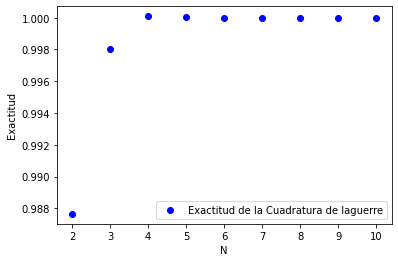

In [ ]:
from matplotlib.patches import StepPatch
n=3
a=0
f= lambda x: x**3/(np.exp(x)-1)

def cuadraturagauss(f,a,n):
  Roots1, Weights1 = np.polynomial.laguerre.laggauss(n)
  suma =0
  for i in range(n):
    valor = Weights1[i]*np.exp(Roots1[i])*f(Roots1[a+i])
    suma+= valor
  return suma

integral = cuadraturagauss(f,a,n)
print(integral)

#B
exacto = ((np.pi)**4)/15
N=[2,3,4,5,6,7,8,9,10]
puntos=[]
for i in N:
  aproximacion = cuadraturagauss(f,a,i)
  error = aproximacion/exacto
  puntos.append(error)

plt.scatter(N,puntos,color='b',label='Exactitud de la Cuadratura de laguerre')
plt.legend()
plt.xlabel('N')
plt.ylabel('Exactitud')


18 Integrales con hermite


In [ ]:
def MedNewtonRaphson (f,df,x0,Toleracia=1e-5,itmax=100): 
   error= 1
   it=0
   while error > Toleracia and it<=itmax:
     x = x0-f(x0)/df(x0)
     error = np.abs(f(x0)/df(x0))
     x0=x
     it+=1
    
   if it==itmax:
     False

   else:
     return x

def Conjunto_raices(f,df,x,precision=4):
   raices= []
   dan= np.array([])
   conjunto= []

   for i in x:
     raiz = MedNewtonRaphson(f,df,i)
     
     if raiz != False:
       n_raiz= np.round(raiz, precision)
       conjunto.append(n_raiz)

       if n_raiz not in raices:
         raices = np.append(raices,n_raiz)

   raices.sort()
   return raices


In [ ]:
#Polinomio de hermite
X= sym.Symbol('x',real=True)
n=20

def GetHermitepoly(x,n):
  f= sym.exp(-x**2)
  df= f.diff(x,n)
  poly= ((-1)**n)*sym.exp(x**2)*df
  return poly

H=[]
dH=[]
for i in range(n+1):
  Hermite= GetHermitepoly(X,i)
  diff= Hermite.diff(X)
  H.append(Hermite)
  dH.append(diff)


def All_roots (n,xn,Hermite,DHermite):
    poly = sym.lambdify([X],Hermite[n],'numpy')
    Dpoly = sym.lambdify([X],DHermite[n],'numpy')
    raices = Conjunto_raices(poly,Dpoly,xn)
    return raices

xn= np.linspace(-10,10,100)
raices = All_roots(n,xn,H,dH)

def GetWeights (raices,Hermite):
    poly_1= sym.lambdify([X],Hermite[n-1],'numpy')
    pesos = []
    for i in range(n):
        Weights= ((2**(n-1))*(np.math.factorial(n))*(np.sqrt(np.pi)))/((n**2)*(poly_1((raices[i]))**2))
        pesos.append(Weights)
    return pesos

[1, 2*x, 4*x**2 - 2, -4*x*(3 - 2*x**2), 16*x**4 - 48*x**2 + 12, -8*x*(-4*x**4 + 20*x**2 - 15), 64*x**6 - 480*x**4 + 720*x**2 - 120, -16*x*(-8*x**6 + 84*x**4 - 210*x**2 + 105), 256*x**8 - 3584*x**6 + 13440*x**4 - 13440*x**2 + 1680, -32*x*(-16*x**8 + 288*x**6 - 1512*x**4 + 2520*x**2 - 945), 1024*x**10 - 23040*x**8 + 161280*x**6 - 403200*x**4 + 302400*x**2 - 30240, -64*x*(-32*x**10 + 880*x**8 - 7920*x**6 + 27720*x**4 - 34650*x**2 + 10395), 4096*x**12 - 135168*x**10 + 1520640*x**8 - 7096320*x**6 + 13305600*x**4 - 7983360*x**2 + 665280, -128*x*(-64*x**12 + 2496*x**10 - 34320*x**8 + 205920*x**6 - 540540*x**4 + 540540*x**2 - 135135), 16384*x**14 - 745472*x**12 + 12300288*x**10 - 92252160*x**8 + 322882560*x**6 - 484323840*x**4 + 242161920*x**2 - 17297280, -256*x*(-128*x**14 + 6720*x**12 - 131040*x**10 + 1201200*x**8 - 5405400*x**6 + 11351340*x**4 - 9459450*x**2 + 2027025), 65536*x**16 - 3932160*x**14 + 89456640*x**12 - 984023040*x**10 + 5535129600*x**8 - 15498362880*x**6 + 19372953600*x**4 - 8

In [ ]:
#Oscilador armonico en mecanica cuantica
f= lambda x: (x**4)
n=20
xn= np.linspace(-10,10,100)
Raices = All_roots(n,xn,H,dH)
Pesos=GetWeights(raices,H)
suma=0
for i in range(n):
    valor= Pesos[i]*f(Raices[i])
    suma+=valor

integral = 2*(1/np.pi)**(1/2)*suma
print(integral)

1.5000418239846258


2.0943195841075304


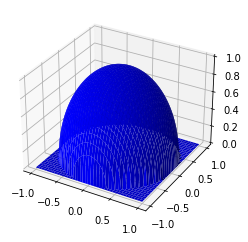

In [ ]:
#7
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)
a = 0.
b = x[-1]
R = 1

def f(x,y,R=1.): 
    z = R**2 - x**2 - y**2
    if z <= 0.:
        return 0.
    else:
        return np.sqrt(z)
f = np.vectorize(f)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,color="b")

area=(x[1]-x[0])*(y[1]-y[0])
volumen=0

for i in range(len(x)):
    for j in range(len(y)):
        p_1=f(x[i],y[j])
        p_2=f(x[i-1],y[j])
        p_3=f(x[i-1],y[j-1])
        p_4=f(x[i],y[j-1])
        
        if p_1 in Z and p_2 in Z and p_3 in Z and p_4 in Z:
            promedio=(p_1+p_2+p_3+p_4)/4
            vol_i=promedio*area
            volumen+=vol_i
    
print(volumen)